In [1]:
import trax
trax.fastmath.backend_name()

'jax'

In [2]:
from pathlib import Path
datadir = Path("../data")

In [3]:
train_stream = trax.data.TFDS(
    'fashion_mnist', 
    keys=('image', 'label'), 
    train=True,
    data_dir=datadir
    )()

eval_stream = trax.data.TFDS(
    'fashion_mnist', 
    keys=('image', 'label'), 
    train=False,
    data_dir=datadir
    )()

/Users/rgrouls/Library/Caches/pypoetry/virtualenvs/deep-learning-xB8KIJr7-py3.8/lib/python3.8/site-packages/jax/_src/lib/xla_bridge.py:429: UserWarning: jax.host_count has been renamed to jax.process_count. This alias will eventually be removed; please update your code.
  warnings.warn(


In [4]:
from trax import layers as tl
train_data_pipeline = trax.data.Serial(
    trax.data.Shuffle(),
    trax.data.Batch(8),
)

train_batches_stream = train_data_pipeline(train_stream)

eval_data_pipeline = trax.data.Batch(8)

eval_batches_stream = eval_data_pipeline(eval_stream)

In [5]:
example_batch = next(train_batches_stream)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

In [6]:
print(f'batch shape (image, label) = {[x.shape for x in example_batch]}')

batch shape (image, label) = [(8, 28, 28, 1), (8,)]


In [7]:
X = example_batch[0]
X.shape

(8, 28, 28, 1)

In [8]:
i = 2 # check the i-th image

<AxesSubplot:>

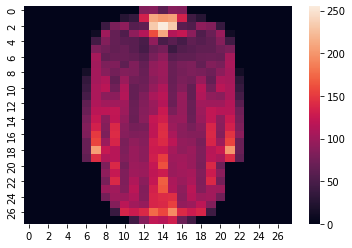

In [9]:
%matplotlib inline
import seaborn as sns
img = X[i, :, :, 0]
sns.heatmap(img)

In [11]:
model = tl.Serial(
      tl.ToFloat(),

      tl.Conv(32, (3, 3), (1, 1), 'SAME'),
      tl.LayerNorm(),
      tl.Relu(),
      tl.MaxPool(),

      tl.Conv(64, (3, 3), (1, 1), 'SAME'),
      tl.LayerNorm(),
      tl.Relu(),
      tl.MaxPool(),

      tl.Flatten(),
      tl.Dense(10),
)

In [12]:
from trax.supervised import training

train_task = training.TrainTask(
    labeled_data=train_batches_stream,
    loss_layer=tl.CategoryCrossEntropy(),
    optimizer=trax.optimizers.Adam(0.01),
    n_steps_per_checkpoint=100,
)

eval_task = training.EvalTask(
    labeled_data=eval_batches_stream,
    metrics=[tl.CategoryCrossEntropy(), tl.CategoryAccuracy()],
    n_eval_batches=20,
)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


In [16]:
training_loop = training.Loop(model, 
                              train_task, 
                              eval_tasks=[eval_task], 
                              output_dir='./cnn_model2')

training_loop.run(1000)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...



Step      1: Total number of trainable weights: 451658
Step      1: Ran 1 train steps in 2.36 secs
Step      1: train CategoryCrossEntropy |  0.28909266


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Step      1: eval  CategoryCrossEntropy |  0.67264730
Step      1: eval      CategoryAccuracy |  0.75625000


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca


Step    100: Ran 99 train steps in 2.79 secs
Step    100: train CategoryCrossEntropy |  0.79253364
Step    100: eval  CategoryCrossEntropy |  0.68655508
Step    100: eval      CategoryAccuracy |  0.80000000


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca


Step    200: Ran 100 train steps in 2.84 secs
Step    200: train CategoryCrossEntropy |  0.60249448
Step    200: eval  CategoryCrossEntropy |  0.48117461
Step    200: eval      CategoryAccuracy |  0.83125000


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca


Step    300: Ran 100 train steps in 2.78 secs
Step    300: train CategoryCrossEntropy |  0.55602872
Step    300: eval  CategoryCrossEntropy |  0.49781504
Step    300: eval      CategoryAccuracy |  0.80000000


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca


Step    400: Ran 100 train steps in 2.72 secs
Step    400: train CategoryCrossEntropy |  0.47505459


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

Step    400: eval  CategoryCrossEntropy |  0.54000964
Step    400: eval      CategoryAccuracy |  0.81875000


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca


Step    500: Ran 100 train steps in 2.79 secs
Step    500: train CategoryCrossEntropy |  0.54868275


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

Step    500: eval  CategoryCrossEntropy |  0.52583842
Step    500: eval      CategoryAccuracy |  0.83125000


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca


Step    600: Ran 100 train steps in 3.05 secs
Step    600: train CategoryCrossEntropy |  0.44461471


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

Step    600: eval  CategoryCrossEntropy |  0.38655858
Step    600: eval      CategoryAccuracy |  0.86875000


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca


Step    700: Ran 100 train steps in 2.74 secs
Step    700: train CategoryCrossEntropy |  0.47138211
Step    700: eval  CategoryCrossEntropy |  0.43014132
Step    700: eval      CategoryAccuracy |  0.85625000


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca


Step    800: Ran 100 train steps in 2.80 secs
Step    800: train CategoryCrossEntropy |  0.45767632
Step    800: eval  CategoryCrossEntropy |  0.51436775
Step    800: eval      CategoryAccuracy |  0.83750000


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca


Step    900: Ran 100 train steps in 2.80 secs
Step    900: train CategoryCrossEntropy |  0.49403778
Step    900: eval  CategoryCrossEntropy |  0.42750804
Step    900: eval      CategoryAccuracy |  0.85625000


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca


Step   1000: Ran 100 train steps in 2.82 secs
Step   1000: train CategoryCrossEntropy |  0.48748913
Step   1000: eval  CategoryCrossEntropy |  0.60941356
Step   1000: eval      CategoryAccuracy |  0.83750000


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

In [25]:
X, y = next(eval_batches_stream)
y

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


array([9, 4, 5, 6, 3, 0, 6, 0])

In [26]:
X.shape, y.shape

((8, 28, 28, 1), (8,))

In [27]:
yhat = model.forward(X)
yhat.shape

(8, 10)

In [28]:
import trax.fastmath.numpy as np
np.argmax(yhat, axis=0)

DeviceArray([7, 4, 3, 4, 1, 2, 3, 6, 1, 0], dtype=int32)

In [29]:
y

array([9, 4, 5, 6, 3, 0, 6, 0])

In [30]:
from trax.models.resnet import Resnet50

resn = Resnet50(n_output_classes=10)

In [31]:
training_loop = training.Loop(resn, 
                              train_task, 
                              eval_tasks=[eval_task], 
                              output_dir='./resnet50')

training_loop.run(1000)

/Users/rgrouls/Library/Caches/pypoetry/virtualenvs/deep-learning-xB8KIJr7-py3.8/lib/python3.8/site-packages/jax/_src/lib/xla_bridge.py:429: UserWarning: jax.host_count has been renamed to jax.process_count. This alias will eventually be removed; please update your code.
  warnings.warn(
/Users/rgrouls/Library/Caches/pypoetry/virtualenvs/deep-learning-xB8KIJr7-py3.8/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:3710: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in zeros is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "zeros")


LayerError: Exception passing through layer Serial (in init):
  layer created in file [...]/trax/models/resnet.py, line 99
  layer input shapes: (ShapeDtype{shape:(8, 28, 28, 1), dtype:uint8}, ShapeDtype{shape:(8,), dtype:int64})

  File [...]/trax/layers/combinators.py, line 108, in init_weights_and_state
    outputs, _ = sublayer._forward_abstract(inputs)

LayerError: Exception passing through layer AvgPool(7,7) (in _forward_abstract):
  layer created in file [...]/trax/models/resnet.py, line 113
  layer input shapes: ShapeDtype{shape:(8, 1, 1, 2048), dtype:float32}

  File [...]/jax/interpreters/partial_eval.py, line 426, in abstract_eval_fun
    _, avals_out, _ = trace_to_jaxpr_dynamic(

  File [...]/jax/_src/profiler.py, line 206, in wrapper
    return func(*args, **kwargs)

  File [...]/jax/interpreters/partial_eval.py, line 1620, in trace_to_jaxpr_dynamic
    jaxpr, out_avals, consts = trace_to_subjaxpr_dynamic(

  File [...]/jax/interpreters/partial_eval.py, line 1657, in trace_to_subjaxpr_dynamic
    ans = fun.call_wrapped(*in_tracers_)

  File [...]/site-packages/jax/linear_util.py, line 166, in call_wrapped
    ans = self.f(*args, **dict(self.params, **kwargs))

  File [...]/site-packages/jax/linear_util.py, line 166, in call_wrapped
    ans = self.f(*args, **dict(self.params, **kwargs))

LayerError: Exception passing through layer AvgPool(7,7) (in pure_fn):
  layer created in file [...]/trax/models/resnet.py, line 113
  layer input shapes: ShapeDtype{shape:(8, 1, 1, 2048), dtype:float32}

  File [...]/trax/layers/base.py, line 743, in forward
    raw_output = self._forward_fn(inputs)

  File [...]/trax/layers/base.py, line 784, in _forward
    return f(*xs)

  File [...]/trax/layers/pooling.py, line 118, in f
    return fastmath.avg_pool(

  File [...]/trax/fastmath/ops.py, line 119, in avg_pool
    return backend()['avg_pool'](*args, **kwargs)

  File [...]/trax/fastmath/jax.py, line 90, in jax_avg_pool
    return _pooling_general(x, lax.add, 0., _normalize_by_window_size,

  File [...]/trax/fastmath/jax.py, line 67, in _pooling_general
    return rescale(out, inputs) if rescale else out  # pylint: disable=not-callable

  File [...]/trax/fastmath/jax.py, line 85, in rescale
    return outputs / window_sizes[..., jnp.newaxis]

  File [...]/site-packages/jax/core.py, line 514, in __getitem__
    def __getitem__(self, idx): return self.aval._getitem(self, idx)

  File [...]/_src/numpy/lax_numpy.py, line 5742, in _rewriting_take
    return _gather(arr, treedef, static_idx, dynamic_idx, indices_are_sorted,

  File [...]/_src/numpy/lax_numpy.py, line 5780, in _gather
    return expand_dims(y, indexer.newaxis_dims)

  File [...]/_src/numpy/lax_numpy.py, line 1860, in expand_dims
    return lax.expand_dims(a, _ensure_index_tuple(axis))

  File [...]/_src/lax/lax.py, line 1169, in expand_dims
    return broadcast_in_dim(array, result_shape, broadcast_dims)

  File [...]/_src/lax/lax.py, line 723, in broadcast_in_dim
    shape = _broadcast_in_dim_shape_rule(

  File [...]/_src/lax/lax.py, line 2593, in _broadcast_in_dim_shape_rule
    _check_shapelike('broadcast_in_dim', 'shape', shape)

  File [...]/_src/lax/lax.py, line 4453, in _check_shapelike
    raise TypeError(msg.format(fun_name, arg_name, bound_error, obj))

TypeError: broadcast_in_dim shape must have every element be nonnegative, got [-5, -5, 1].